Basado en EreZZoR
/
stockPredictor

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [5]:
def visualizar(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Precio máximo real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.xlabel('Tiempo')
    plt.ylabel('Precio de la acción')
    plt.legend()
    plt.show()

In [6]:
yf.pdr_override()

datatraining = pdr.get_data_yahoo("NVDA", start="2010-01-01", end="2020-01-01")['High']
datatest = pdr.get_data_yahoo("NVDA", start="2020-01-01", end="2021-01-01")['High']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
trainingSet = pd.DataFrame(datatraining)
testSet = pd.DataFrame(datatest)

In [8]:
trainingSet.head()

,High
Date,
2010-01-04,4.655
2010-01-05,4.740
2010-01-06,4.730
2010-01-07,4.715
2010-01-08,4.670


In [26]:
testSet.head()

,High
Date,
2020-01-02,59.977501
2020-01-03,59.457500
2020-01-06,59.317501
2020-01-07,60.442501
2020-01-08,60.509998


Nomralizacion de valores entre 1 y 0

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainingSetScaled = sc.fit_transform(trainingSet)

Se entrena la Red proporcionando 100 datos de entrada y 1 de salida en cada iteración

In [10]:
timeSteps = 100
xTrain = []
yTrain = []

 xTrain = lista de conjuntos de 100 datos.


 yTrain = lista de valores

In [11]:
for i in range(0, len(trainingSetScaled)-timeSteps):
    xTrain.append(trainingSetScaled[i:i+timeSteps, 0])
    yTrain.append(trainingSetScaled[i+timeSteps,0])

Preferiblemente usar numpy ya que:

    1. Deberemos transformar xTrain (actualmente de dos dimensiones) a tres dimensiones.
    2. Los programas que usan Numpy generalmente son más rápidos (sobretodo en IA).

In [12]:
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

 Hay que añadir una dimensión a xTrain, nos lo pide la libreria Keras

In [13]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

Parámetros que deberemos proporcionar a Keras (Sequential()).

In [14]:
dim_entrada = (xTrain.shape[1],1) # No hace falta la primera.
dim_salida = 1
na = 50 # numero de neurona que tiene la capa lstm

units = neuronas de la capa | return_sequences = hay más capas? | input_shape = dimensión entrada | 
    Dropout(%) = Número de neuronas que queremos ignorar en la capa de regularización (normalmente es de un 20%).

In [15]:
regresor = Sequential() # Inicializa el modelo

Capa 1

In [16]:
regresor.add(LSTM(units=na, input_shape=dim_entrada))

Capa output

In [17]:
regresor.add(Dense(units=dim_salida))
regresor.compile(optimizer='rmsprop', loss='mse') # mse = mean_squared_error

Encajar Red Neuronal en Set Entrenamiento

epochs = iteraciones para entrenar tu modelo

batch_size = numero ejemplos entrenamiento (cuanto más alto, más memoria necesitarás).  

In [18]:
regresor.fit(xTrain,yTrain,epochs=20, batch_size=32)

Epoch 1/20
76/76 [==============================] - 6s 49ms/step - loss: 0.0085
Epoch 2/20
76/76 [==============================] - 4s 55ms/step - loss: 9.2332e-04
Epoch 3/20
76/76 [==============================] - 4s 55ms/step - loss: 6.0290e-04
Epoch 4/20
76/76 [==============================] - 4s 54ms/step - loss: 5.3422e-04
Epoch 5/20
76/76 [==============================] - 4s 53ms/step - loss: 4.1880e-04
Epoch 6/20
76/76 [==============================] - 4s 52ms/step - loss: 3.6209e-04
Epoch 7/20
76/76 [==============================] - 4s 54ms/step - loss: 3.3353e-04
Epoch 8/20
76/76 [==============================] - 4s 54ms/step - loss: 2.8362e-04
Epoch 9/20
76/76 [==============================] - 4s 53ms/step - loss: 2.4922e-04
Epoch 10/20
76/76 [==============================] - 4s 52ms/step - loss: 2.4359e-04
Epoch 11/20
76/76 [==============================] - 4s 51ms/step - loss: 2.1943e-04
Epoch 12/20
76/76 [==============================] - 4s 52ms/step - loss: 1.95

Normalizar el conjunto de Test y relizamos las mismas operaciones que anteriormente

In [19]:
auxTest = sc.transform(testSet.values)
xTest = []

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
for i in range(0, len(auxTest)-timeSteps):
    xTest.append(auxTest[i:i+timeSteps,0])

In [21]:
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1], 1))

Se realiza la Predicción


In [22]:
prediccion = regresor.predict(xTest)

Retornamos los valores de la Predicción para que esten en el mismo formato de los datos originales

In [23]:
prediccion = sc.inverse_transform(prediccion)

Grafica de resultados

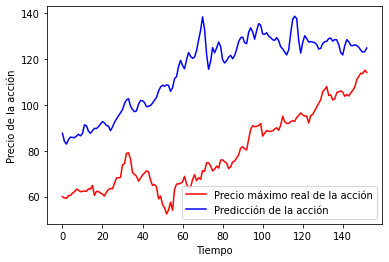

In [24]:
visualizar(testSet.values,prediccion)

In [ ]:
plt.plot(real[0:len(prediccion)],color='red', label='Precio máximo real de la acción')
plt.plot(prediccion, color='blue', label='Predicción de la acción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la acción')
plt.legend()
plt.show()